In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../../spectroscopy/ZTF20aayhacx_20200608_P60_v2.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200608_P60

## Si II 6355

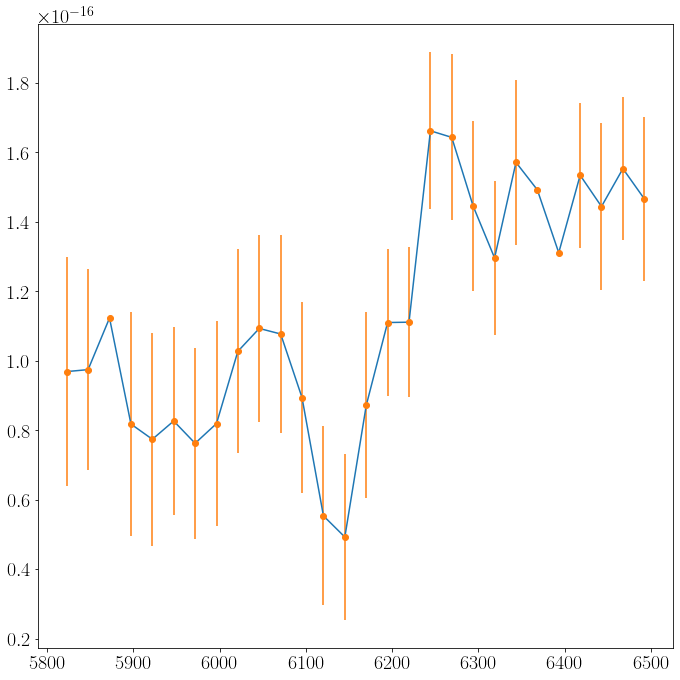

In [3]:
Spec1.plot_line_region(5800, 6500)

In [4]:
Spec1.add_line('SiII_6355', 6000, 6300, lines=[6371.359, 6347.103])

12 points within 6000.00 and 6300.00 angstroms.


../absorption_line_vel.py:149: UserWarning: <=5 points within the wavelength range!
  warnings.warn(


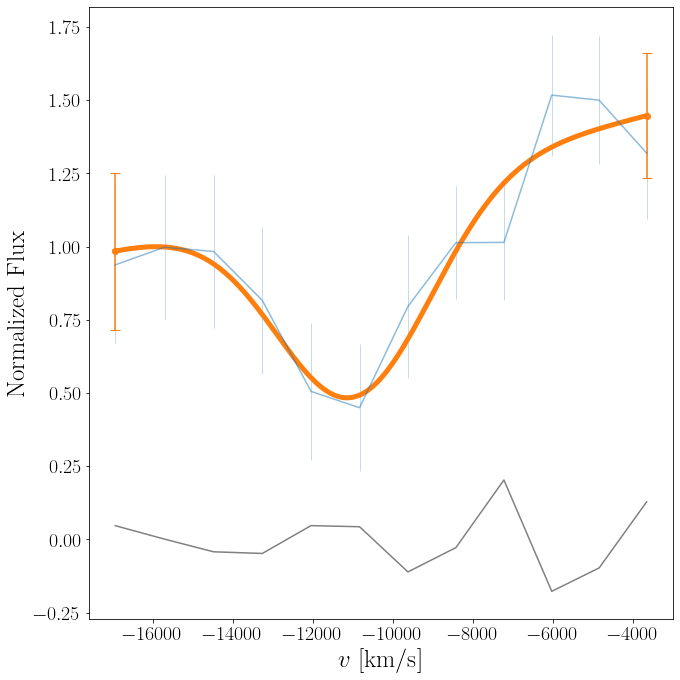

LS estimation:
Velocity pvf: -10392 km/s


In [5]:
Spec1.line['SiII_6355'].LS_estimator()

  0%|          | 3/50000 [00:00<31:15, 26.66it/s]

Normalize factor = 0.477


  6%|▌         | 3000/50000 [01:03<16:40, 46.99it/s]


MCMC results:
Velocity pvf: -10730 pm 233 km/s


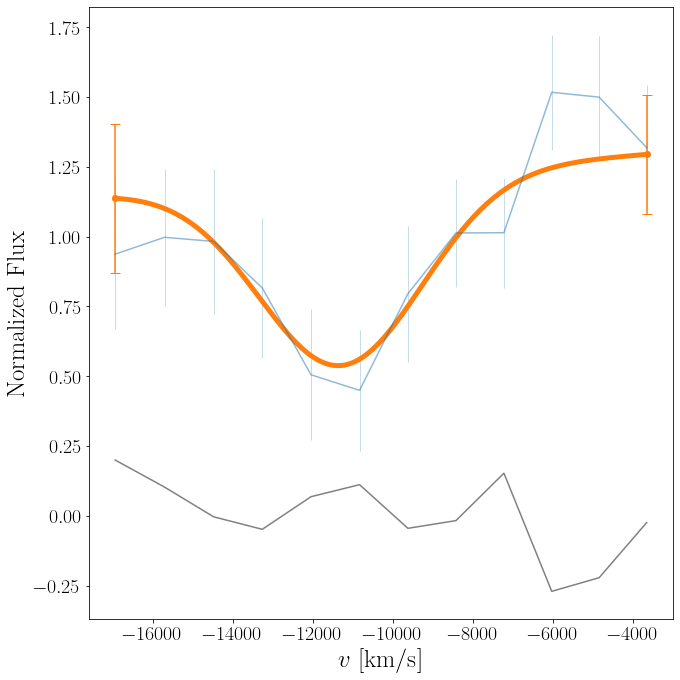

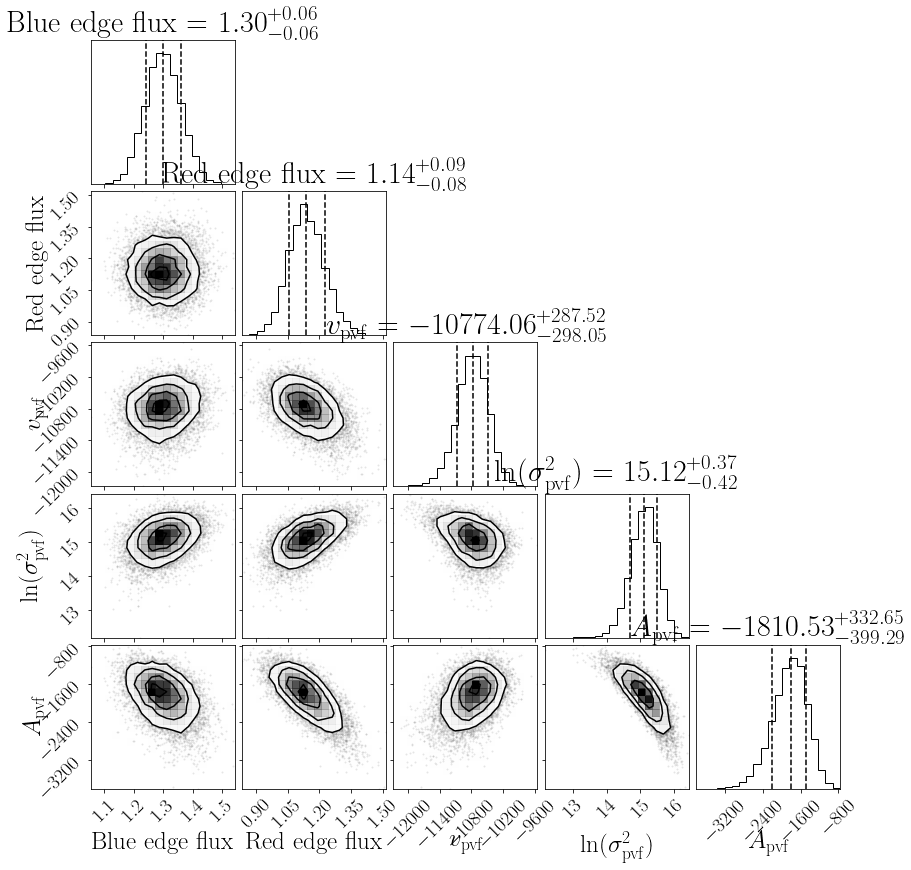

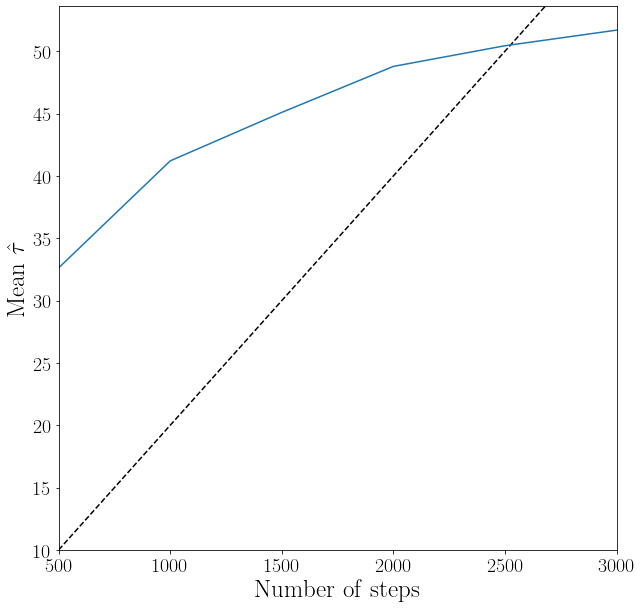

In [6]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler(normalize_unc=True,
                                               Plot_mcmc=True,
                                               Plot_tau=True)

## Ca II IRT

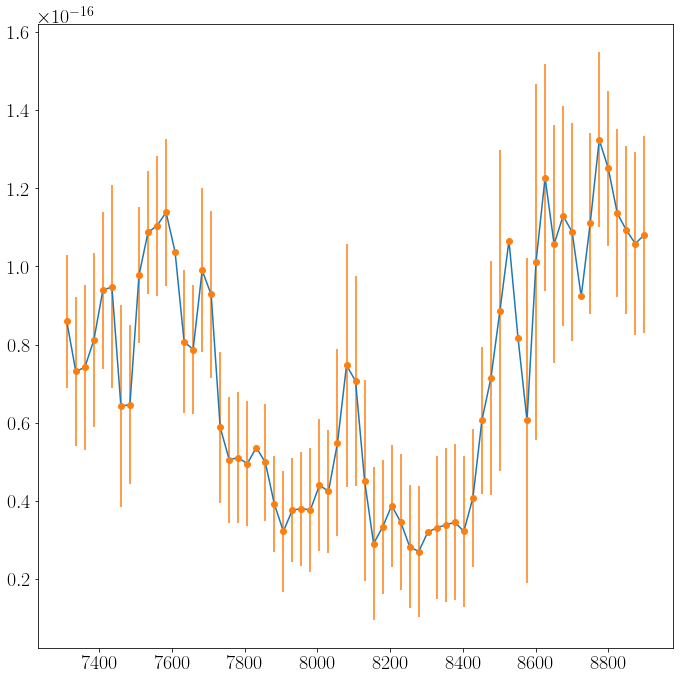

In [7]:
Spec1.plot_line_region(7300, 8900)

In [8]:
Spec1.add_line('CaII_IRT', 7400, 8900, lines=[8498.018, 8542.089, 8662.140])

61 points within 7400.00 and 8900.00 angstroms.


../absorption_line_vel.py:347: UserWarning: Some flux with extremely low uncertainty!
  warnings.warn("Some flux with extremely low uncertainty!")
../absorption_line_vel.py:149: UserWarning: <=5 points within the wavelength range!
  warnings.warn(


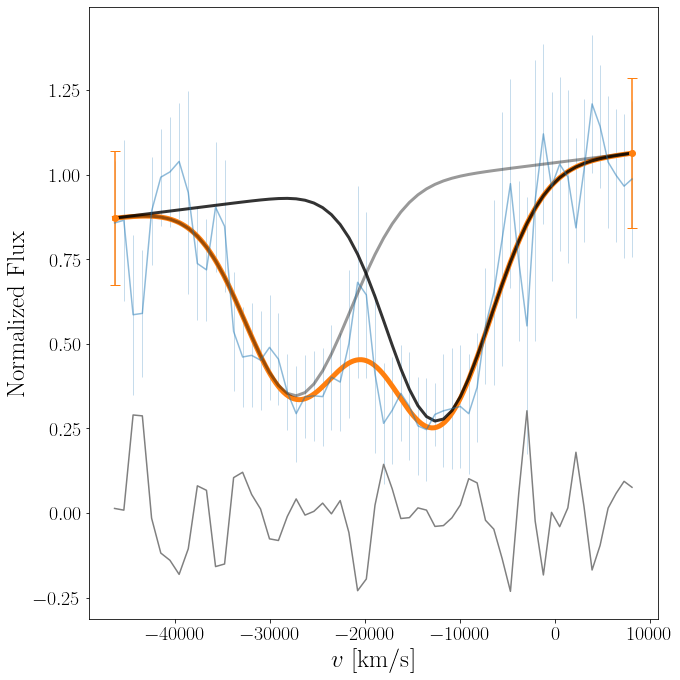

LS estimation:
Velocity pvf: -8849 km/s
Velocity hvf: -23673 km/s


In [9]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10500, 15, -1000, -25000, 15, -1000))

  0%|          | 3/1000 [00:00<00:35, 27.78it/s]

Normalize factor = 0.529


  0%|          | 3/50000 [00:00<38:48, 21.47it/s]

MCMC results:
Velocity pvf: -8907 pm 492 km/s
Velocity hvf: -23676 pm 669 km/s
Normalize factor = 0.529


 11%|█         | 5500/50000 [03:27<28:00, 26.48it/s]  


MCMC results:
Velocity pvf: -8844 pm 615 km/s
Velocity hvf: -23814 pm 747 km/s


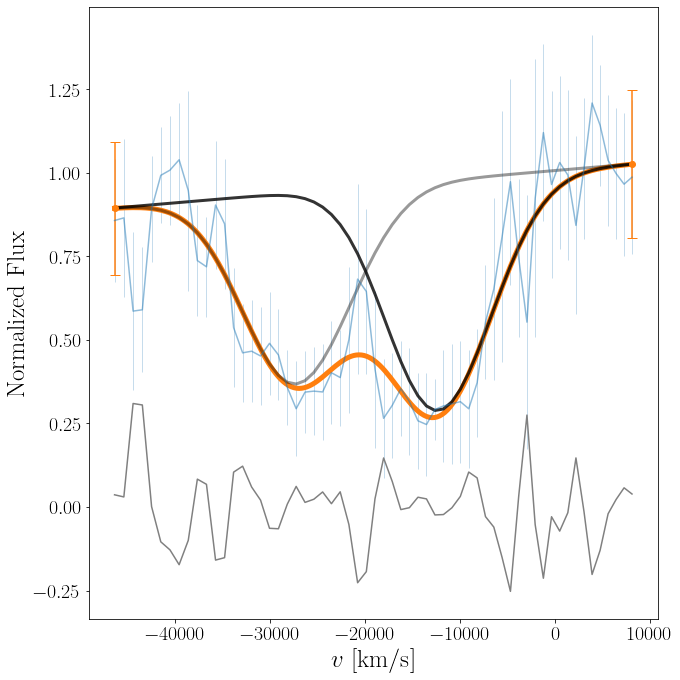

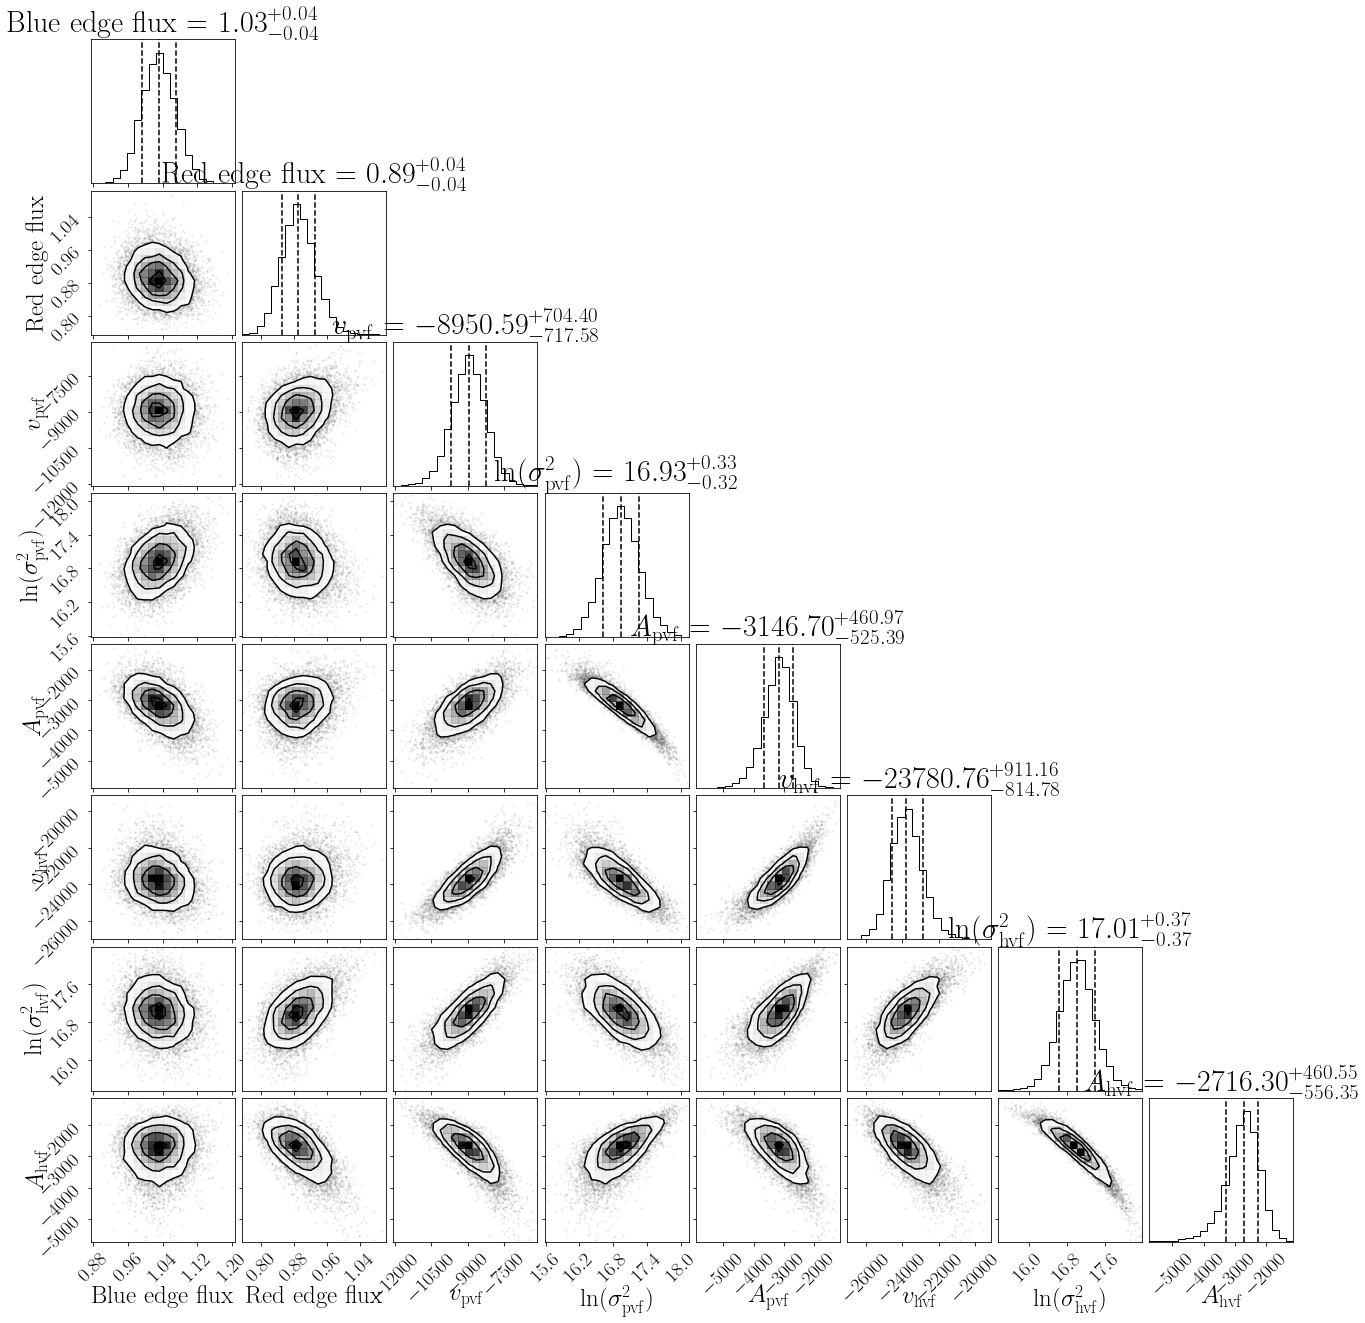

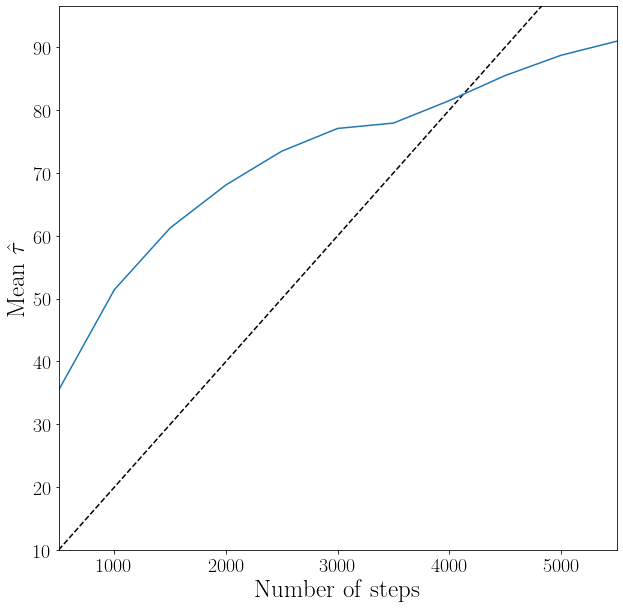

In [10]:
mu_pvf_prior = -9000
var_pvf_prior = 2e2**3
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              initial=[],
                                              normalize_unc=True,
                                              max_nsteps=1000,
                                              Plot_model=False)
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    mu_pvf=mu_pvf_prior,
    var_pvf=var_pvf_prior,
    initial=Spec1.line['CaII_IRT'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)